In [147]:
from visual_behavior.data_access import loading
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt
from visual_behavior_glm.glm import GLM
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import visual_behavior.utilities as vbu
import visual_behavior.plotting as vbp
import os
pd.set_option('display.max_columns', 500)
import seaborn as sns
%widescreen
%matplotlib notebook

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


In [3]:
glm_version='9a_L2_optimize_by_session'
dropout_summary = gat.retrieve_results({'glm_version':glm_version}, results_type='summary')

In [5]:
dropout_summary_9a.columns

Index(['_id', 'dropout', 'absolute_change_from_full', 'variance_explained',
       'variance_explained_full', 'fraction_change_from_full',
       'cell_specimen_id', 'adj_fraction_change_from_full',
       'adj_variance_explained', 'adj_variance_explained_full', 'glm_version',
       'ophys_experiment_id', 'ophys_session_id', 'entry_time_utc',
       'behavior_session_id', 'container_id', 'project_code',
       'container_workflow_state', 'experiment_workflow_state', 'session_name',
       'session_type', 'equipment_name', 'date_of_acquisition',
       'isi_experiment_id', 'specimen_id', 'sex', 'age_in_days',
       'full_genotype', 'reporter_line', 'driver_line', 'imaging_depth',
       'targeted_structure', 'published_at', 'super_container_id', 'cre_line',
       'session_tags', 'failure_tags', 'exposure_number',
       'model_outputs_available', 'location', 'has_events', 'session_number'],
      dtype='object')

In [122]:
lick_cells = dropout_summary_9a.query('dropout=="single-licks" and adj_fraction_change_from_full < -0.2')
lick_cell = lick_cells.sample().iloc[0]

In [123]:
lick_cell['ophys_experiment_id']

974384470

extracting cached data from 974384470_479426_191030_VISp_175_cre_line_unknown_2P5_behavior_3imagesAretake


/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


KeyError: 'time'

extracting cached data from 974384470_479426_191030_VISp_175_cre_line_unknown_2P5_behavior_3imagesAretake


/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


<IPython.core.display.Javascript object>


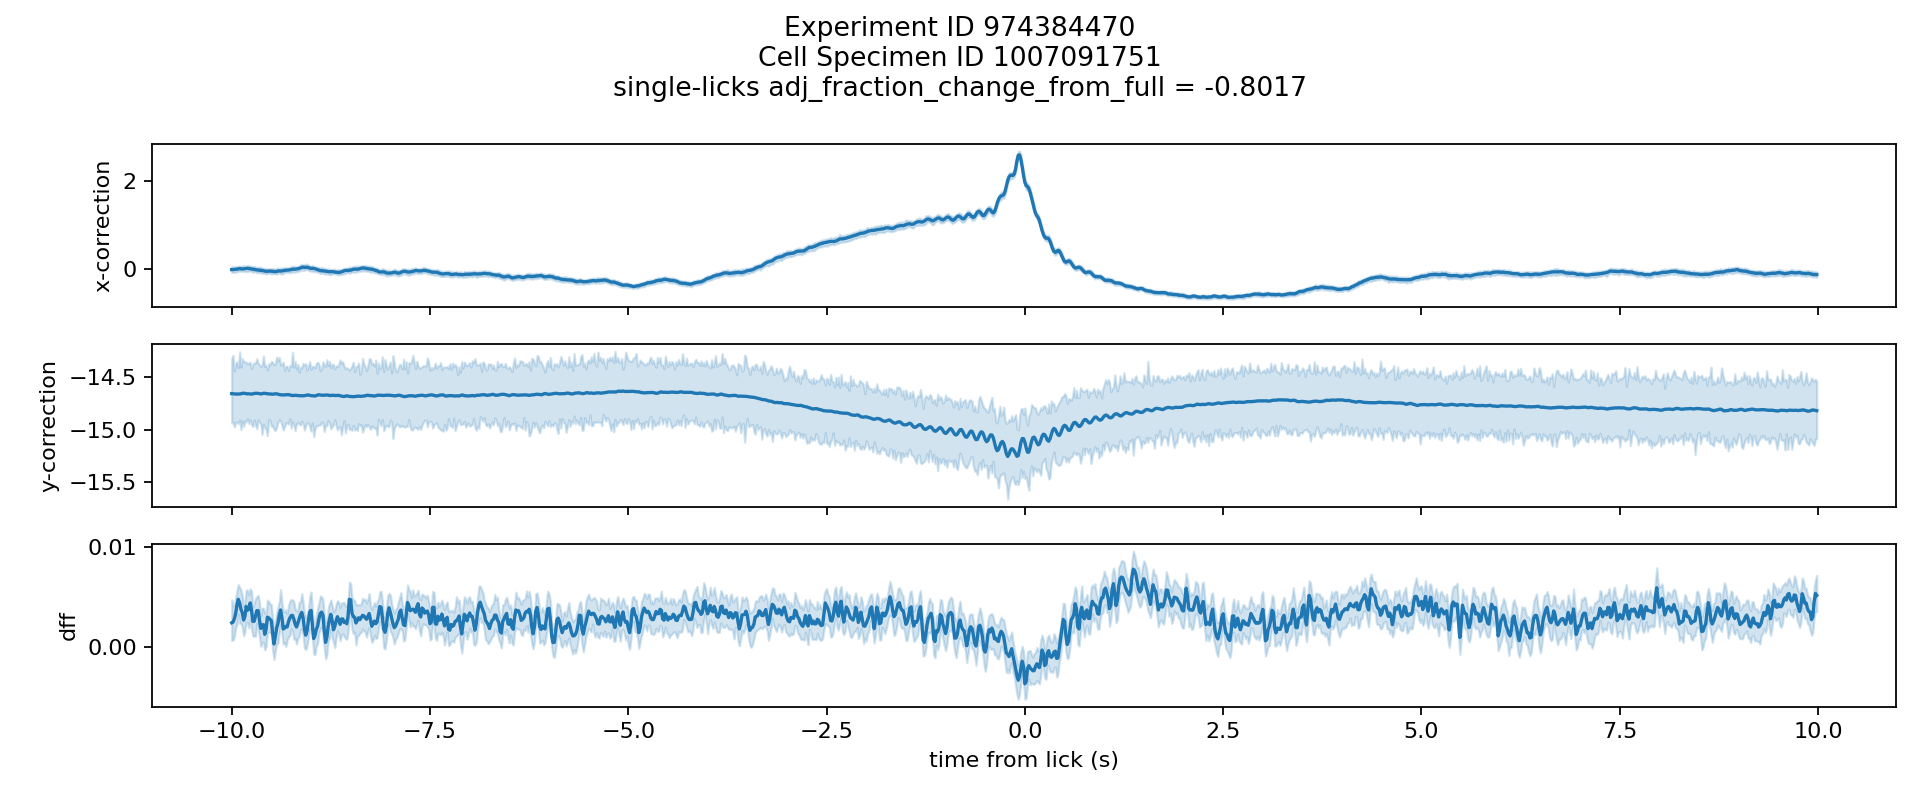

In [144]:
glm_version='9a_L2_optimize_by_session'
dropout='single-licks'
ophys_experiment_id = lick_cell['ophys_experiment_id']
cell_specimen_id = lick_cell['cell_specimen_id']

res = gat.retrieve_results({
    'glm_version':glm_version,
    'ophys_experiment_id':int(ophys_experiment_id),
    'cell_specimen_id':int(cell_specimen_id),
    'dropout':dropout
}, results_type='summary').iloc[0]

title='Experiment ID {}\nCell Specimen ID {}\n{} adj_fraction_change_from_full = {:0.4f}'.format(
    res['ophys_experiment_id'],
    res['cell_specimen_id'],
    res['dropout'],
    res['adj_fraction_change_from_full']
)
fig,ax = gvt.plot_lick_triggered_motion(lick_cell['ophys_experiment_id'], lick_cell['cell_specimen_id'], title=title)

In [151]:
savepath = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/lick-triggered_avg_plots'

vbp.save_figure(fig, fname=os.path.join(savepath, '{}.png'.format(title)), size=(15,8))

In [143]:
reload(gvt)

<module 'visual_behavior_glm.GLM_visualization_tools' from '/home/dougo/Code/visual_behavior_glm/visual_behavior_glm/GLM_visualization_tools.py'>